In [0]:
#code resource--->https://github.com/sudharsan13296/Hands-On-Meta-Learning-With-Python/blob/master/02.%20Face%20and%20Audio%20Recognition%20using%20Siamese%20Networks/2.4%20Face%20Recognition%20Using%20Siamese%20Network.ipynb
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=9a22d97a7aeec97a640fb00dc1a30698d3de8b657ec667d10e8ac0a4620d8d40
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 11.4 GB  | Proc size: 2.2 GB
GPU RAM Free: 15473MB | Used: 807MB | Util   5% | Total 16280MB


In [0]:
!git clone https://github.com/yashpatel7025/Machine-Learning-A-Z.git


Cloning into 'Machine-Learning-A-Z'...
remote: Enumerating objects: 445, done.
remote: Counting objects: 100% (445/445), done.
remote: Compressing objects: 100% (444/444), done.
remote: Total 10851 (delta 0), reused 445 (delta 0), pack-reused 10406
Receiving objects: 100% (10851/10851), 225.59 MiB | 28.32 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Checking out files: 100% (10407/10407), done.


In [0]:
# Convolutional Neural Network

# Installing Keras
# Enter the following command in a terminal (or anaconda prompt for Windows users): conda install -c conda-forge keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense



In [0]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [0]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/Machine-Learning-A-Z/dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/Machine-Learning-A-Z/dataset',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [0]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)

NameError: ignored

In [0]:
!git clone https://github.com/yashpatel7025/Machine-Learning-A-Z.git

Cloning into 'Machine-Learning-A-Z'...
remote: Enumerating objects: 445, done.
remote: Counting objects: 100% (445/445), done.
remote: Compressing objects: 100% (444/444), done.
remote: Total 10851 (delta 0), reused 445 (delta 0), pack-reused 10406
Receiving objects: 100% (10851/10851), 225.59 MiB | 32.91 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Checking out files: 100% (10407/10407), done.


In [0]:
dataset_path = '/content/Machine-Learning-A-Z/dataset/'

import re
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop




In [0]:
def read_image(filename, byteorder='>'):
    
    #first we read the image, as a raw file to the buffer
    with open(filename, 'rb') as f:
        buffer = f.read()
    
    #using regex, we extract the header, width, height and maxval of the image
    header, width, height, maxval = re.search(
        b"(^P5\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    
    #then we convert the image to numpy array using np.frombuffer which interprets buffer as one dimensional array
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

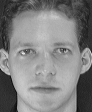

In [0]:
Image.open(dataset_path+'s1/1.pgm')

In [0]:
img = read_image(dataset_path+'s1/1.pgm')
img.shape


(112, 92)

In [0]:
size = 2
total_sample_size = 10000


def get_data(size, total_sample_size):
    #read the image
    image = read_image(dataset_path+ 's' + str(1) + '/' + str(1) + '.pgm', 'rw+')
    #reduce the size
    image = image[::size, ::size]
    #get the new size
    dim1 = image.shape[0]
    dim2 = image.shape[1]

    count = 0
    
    #initialize the numpy array with the shape of [total_sample, no_of_pairs, dim1, dim2]
    x_geuine_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2])  # 2 is for pairs
    y_genuine = np.zeros([total_sample_size, 1])
    
    for i in range(40):
        for j in range(int(total_sample_size/40)):
            ind1 = 0
            ind2 = 0
            
            #read images from same directory (genuine pair)
            while ind1 == ind2:
                ind1 = np.random.randint(10)
                ind2 = np.random.randint(10)
            
            # read the two images
            img1 = read_image(dataset_path+ 's' + str(i+1) + '/' + str(ind1 + 1) + '.pgm', 'rw+')
            img2 = read_image(dataset_path+ 's' + str(i+1) + '/' + str(ind2 + 1) + '.pgm', 'rw+')
            #reduce the size
            img1 = img1[::size, ::size]
            img2 = img2[::size, ::size]
            
            #store the images to the initialized numpy array
            x_geuine_pair[count, 0, 0, :, :] = img1
            x_geuine_pair[count, 1, 0, :, :] = img2
            
            #as we are drawing images from the same directory we assign label as 1. (genuine pair)
            y_genuine[count] = 1
            count += 1

    count = 0
    x_imposite_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2])
    y_imposite = np.zeros([total_sample_size, 1])
    
    for i in range(int(total_sample_size/10)):
        for j in range(10):
            
            #read images from different directory (imposite pair)
            while True:
                ind1 = np.random.randint(40)
                ind2 = np.random.randint(40)
                if ind1 != ind2:
                    break
                    
            img1 = read_image(dataset_path + 's' + str(ind1+1) + '/' + str(j + 1) + '.pgm', 'rw+')
            img2 = read_image(dataset_path + 's'+ str(ind2+1) + '/' + str(j + 1) + '.pgm', 'rw+')

            img1 = img1[::size, ::size]
            img2 = img2[::size, ::size]

            x_imposite_pair[count, 0, 0, :, :] = img1
            x_imposite_pair[count, 1, 0, :, :] = img2
            #as we are drawing images from the different directory we assign label as 0. (imposite pair)
            y_imposite[count] = 0
            count += 1
            
    #now, concatenate, genuine pairs and imposite pair to get the whole data
    X = np.concatenate([x_geuine_pair, x_imposite_pair], axis=0)/255
    Y = np.concatenate([y_genuine, y_imposite], axis=0)

    return X, Y


In [0]:
X, Y = get_data(size, total_sample_size)

In [0]:
#there is 20000 rows .....in 1 row ,2 images are there of 56 by 46 ..and is B/W image
X.shape

(20000, 2, 1, 56, 46)

In [0]:
Y.shape

(20000, 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25)

In [0]:
len(x_train)

15000

In [0]:
len(x_test)

5000

In [0]:
#this will act as a base layer

def build_base_network(input_shape):
    
    seq = Sequential()
    
    nb_filter = [6, 12]
    kernel_size = 3
    
    
    #convolutional layer 1
    seq.add(Convolution2D(nb_filter[0], kernel_size, kernel_size, input_shape=input_shape,
                          border_mode='valid', dim_ordering='th'))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2)))  
    seq.add(Dropout(.25))
    
    #convolutional layer 2
    seq.add(Convolution2D(nb_filter[1], kernel_size, kernel_size, border_mode='valid', dim_ordering='th'))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='th')) 
    seq.add(Dropout(.25))

    #flatten 
    seq.add(Flatten())
    seq.add(Dense(128, activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(50, activation='relu'))
    return seq

In [0]:

input_dim = x_train.shape[2:]
# Input(shape=input_dim) returns Tensor
# understand what tenor is https://towardsdatascience.com/quick-ml-concepts-tensors-eb1330d7760f
# understand about tensor from docs https://keras.io/getting-started/functional-api-guide/
#img_a and img_b are tensor objects and it is input layer
# Unlike the Sequential model, you must create and define a standalone Input layer that specifies the shape of input data.
# The input layer takes a shape argument that is a tuple that indicates the dimensionality of the input data.

img_a = Input(shape=input_dim) #input layer
img_b = Input(shape=input_dim) #input layer
#output of firt layer i.e img_a and img_b will be given to the input of next level which is whole 1 layer i.e base_network layer

In [0]:
img_a

<tf.Tensor 'input_2:0' shape=(?, 1, 56, 46) dtype=float32>

In [0]:
img_a.shape

TensorShape([Dimension(None), Dimension(1), Dimension(56), Dimension(46)])

In [0]:
# a layer instance is callable on a tensor, and returns a tensor
# for more docs--->https://keras.io/getting-started/functional-api-guide/
# All models are callable, just like layers...in build_base_network(), seq is model and base_network will be = seq after function call...therefoe base_network is copy of seq hence it is also model...further there is base_network(img_a)....therefore we are caling the model and passing the tensor object to model

# for more https://keras.io/getting-started/functional-api-guide/
# base_network = seq..... which will return from function
# from docs----> (With the functional API, it is easy to reuse trained models: you can treat any model as if it were a layer, by calling it on a tensor. Note that by calling a model you aren't just reusing the architecture of the model, you are also reusing its weights.)
# hence base_network is the model itself
# tutorial--->https://machinelearningmastery.com/keras-functional-api-deep-learning/

#I thik we are using functional API bcoz we arenot using CNN to train our dataset...we just want feature of images Using CNN ...therefore we have to use functional API to get intermediate layer outputs...
#we are using functional API bcoz we want 2 CNN at the same time for 2 images...therefore it is ot possible using directly CNN...we have functional api which is used to make complex models... hence we are using it
base_network = build_base_network(input_dim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (3, 3), input_shape=(1, 56, 46..., padding="valid", data_format="channels_first")`
  if sys.path[0] == '':







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), padding="valid", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`


In [0]:
base_network

In [0]:
# The layers in the model are connected pairwise.
# his is done by specifying where the input comes from when defining each new layer. A bracket notation is used, such that after the layer is created, the layer from which the input to the current layer comes from is specified.
# It is this way of connecting layers piece by piece that gives the functional API its flexibility
#consider base_network as the 1 whole layer itself...input img is given to this whole first layer..'feat_vecs_a' is like 'output_1' in bottommost commented code
#here we wantto CNN at the same time therefore fea_vecs_b is also there
#we can see shape of feat_vecs_a is (?,50) bcoz at last layer in function base_network() is seq.add(Dense(50, activation='relu'))...therefore it will have 50 nodes
#{
#inputs = Input(shape=(784,))
#output_1 = Dense(64, activation='relu')(inputs)
#}
#compare above code to below
#{
#img_a = Input(shape=input_dim)<---input layer
#feat_vecs_a = base_network(img_a) 
#}
#in above first example output_1 would have shape (?, 64)
#in above second example we have 50 nodes in last layer in base_network therfore shape of feat_vecs_a is(?,50)
feat_vecs_a = base_network(img_a)
feat_vecs_b = base_network(img_b)

In [0]:
feat_vecs_a

<tf.Tensor 'sequential_1/dense_3/Relu:0' shape=(?, 50) dtype=float32>

In [0]:
feat_vecs_a.shape

TensorShape([Dimension(None), Dimension(50)])

In [0]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [0]:
#we are here MANUALLY applying the classification algorithm to find distance beteen 2 images...this logic usually written in algorithm itself when we apply sigmoid or other clssification function in standard CNN method...but we ae using fcuntional apis ad we have 2 cnn as the same time so we have to write our logic seperately....

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([feat_vecs_a, feat_vecs_b])

In [0]:
#here distance is only 1 tensor i.e 1 node(confirm node and tensors are same or diffrent..?) which we usually see at the end of CNN...which will be the integer number which will denote the distnce between 2 images
distance

<tf.Tensor 'lambda_1/Sqrt:0' shape=(?, 1) dtype=float32>

In [0]:
epochs = 13
rms = RMSprop()

In [0]:
#Keras provides a Model class that you can use to create a model from your created layers. It requires that you only specify the input and output layers.
#img_a and img_b are 2 input layers and distance is output layer
model = Model(input=[img_a, img_b], output=distance)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("la...)`
  """Entry point for launching an IPython kernel.


In [0]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

In [0]:
model.compile(loss=contrastive_loss, optimizer=rms)

In [0]:
#img_1 and img2 will contain all the 15000 train images
img_1 = x_train[:, 0]
img2 = x_train[:, 1]

In [0]:
img_1.shape

(15000, 1, 56, 46)

In [0]:
img2.shape

(15000, 1, 56, 46)

In [0]:
model.fit([img_1, img2], y_train, validation_split=.25,
          batch_size=128, verbose=2, nb_epoch=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Train on 11250 samples, validate on 3750 samples
Epoch 1/13
 - 8s - loss: 0.1692 - val_loss: 0.1935
Epoch 2/13
 - 1s - loss: 0.1004 - val_loss: 0.1249
Epoch 3/13
 - 1s - loss: 0.0757 - val_loss: 0.1081
Epoch 4/13
 - 1s - loss: 0.0613 - val_loss: 0.0866
Epoch 5/13
 - 1s - loss: 0.0503 - val_loss: 0.0625
Epoch 6/13
 - 1s - loss: 0.0445 - val_loss: 0.0542
Epoch 7/13
 - 1s - loss: 0.0397 - val_loss: 0.0452
Epoch 8/13
 - 1s - loss: 0.0366 - val_loss: 0.0385
Epoch 9/13
 - 1s - loss: 0.0340 - val_loss: 0.0302
Epoch 10/13
 - 1s - loss: 0.0317 - val_loss: 0.0305
Epoch 11/13
 - 1s - loss: 0.0291 - val_loss: 0.0237
Epoch 12/13
 - 1s - loss: 0.0277 - val_loss: 0.0203
Epoch 13/13
 - 1s - loss: 0.0257 - val_loss: 0.0201


In [0]:
pred = model.predict([x_test[:, 0], x_test[:, 1]])

In [0]:
pred.shape

(5000, 1)

In [0]:
def compute_accuracy(predictions, labels):
    return labels[predictions.ravel() < 0.5].mean()

In [0]:
compute_accuracy(pred, y_test)

0.9680972274971515

In [0]:
y_test.ravel().astype(int)

5000

In [144]:
(pred.ravel()<0.5).astype(int)

array([0, 1, 1, ..., 0, 0, 0])

In [0]:
 len(y_test[pred.ravel()<0.5])

2633

In [143]:
 y_test[pred.ravel()<0.5]
  

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [145]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test.ravel().astype(int),(pred.ravel()<0.5).astype(int))



array([[2367,   84],
       [   0, 2549]])

In [151]:
from sklearn.metrics import accuracy_score 
accuracy_score (y_test.ravel().astype(int),(pred.ravel()<0.5).astype(int))

0.9832

#Always open these 2 links and try to understand above code....its fucking awesome

*  https://keras.io/getting-started/functional-api-guide/
* https://machinelearningmastery.com/keras-functional-api-deep-learning/
* https://github.com/sudharsan13296/Hands-On-Meta-Learning-With-Python/blob/master/02.%20Face%20and%20Audio%20Recognition%20using%20Siamese%20Networks/2.4%20Face%20Recognition%20Using%20Siamese%20Network.ipynb
* take a look at this....https://blog.eduonix.com/artificial-intelligence/functional-api-keras/

* In functional API Models are defined by creating instances of layers and connecting them directly to each other in pairs, 
then defining a Model that specifies the layers to act as the input and output to the model.
###compare following code with above our code






In [0]:
#uncomment and then take look for better understandig
'''
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))     #input layer

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(64, activation='relu')(inputs)
output_2 = Dense(64, activation='relu')(output_1)
predictions = Dense(10, activation='softmax')(output_2)   #output layer

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels)  # starts training

'''

* Input(shape=(784,)) returns tensor
* now we are step by step making layers in above code similarly    as we do with Sequencial model
* output_1 = Dense(64, activation='relu')(inputs) ..here 'inputs' tensor we have given to Dense layer as input...output of this layer will be given to next layer..likewise will keep giving ones outputs to other layer inputs,...
* 'predictions' is the final output layer 
* Keras provides a Model class that you can use to create a model from your created layers. It requires that you only specify the input and output layers.

In [0]:
inputs = Input(shape=(784,))
output_1 = Dense(64, activation='relu')(inputs)